X.head(): 
    House Size (sq.ft.)
0                 1940
1                 1300
2                 1420
3                 1680
4                 1270
y.head(): 
 0    1116000
1     860000
2     818400
3    1000000
4     640000
Name: House Price, dtype: int64


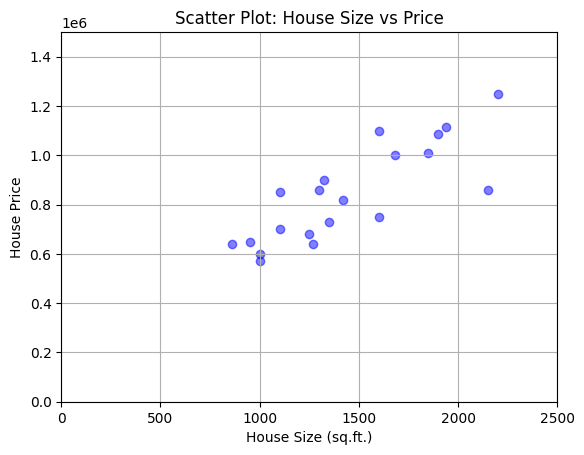

y-predictions:
 [[634973.36884605]
 [772590.58762453]
 [752930.98494189]
 [890548.20372037]]
Intercept:  [261440.9178759]
Slope:  [[393.19205365]]


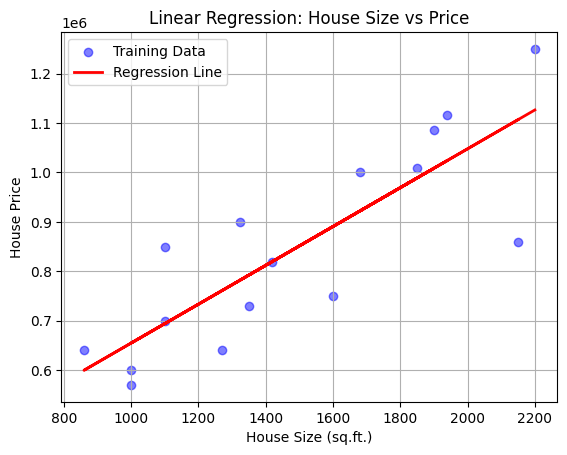

In [2]:
# Import the necessary libraries for data manipulation and modeling.
"""
    We implement a simple linear regression model to predict house price
    as a function of its size.

    Steps:
    - Load the dataset.
    - Visualize the relationship between house price and size.
    - Split the data into training and testing sets.
    - Fit a linear regression model with scikit-learn.
    - Evaluate the model and analyze the estimated coefficients.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data file into a pandas DataFrame.
"""
    Load the 'Housing.xlsx' dataset containing information on house prices and features.

    Key variables in the dataset:
    - House Price: House price (dependent variable).
    - House Size (sq.ft.): House size in square feet (independent variable).
"""
data = pd.read_excel("./data/Housing.xlsx")

# Data preview
data.head()

# Variable selection for the analysis.
"""
    Split variables into:
    - X: Independent variable (House Size).
    - y: Dependent variable (House Price).

    These variables will be used to fit the linear regression model.
"""
X = data[['House Size (sq.ft.)']]
y = data['House Price']

# Display the first rows to verify the data loaded correctly.
print("X.head(): \n", X.head())
print("y.head(): \n", y.head())

# Visualize the relationship between House Size and House Price.
"""
    Generate a scatter plot to observe the relationship between house size and price.

    - Axis limits are set to improve visualization.
    - A grid is added to make the chart easier to read.
"""
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlim(0, 2500)
plt.ylim(0, 1500000)
plt.xlabel("House Size (sq.ft.)")
plt.ylabel("House Price")
plt.title("Scatter Plot: House Size vs Price")
plt.grid(True)
plt.show()

# Split the dataset into training and testing sets.
"""
    Split the dataset into two parts:
    - Training set (80%): Used to fit the model.
    - Test set (20%): Used to evaluate the model’s generalization ability.

    The seed 'random_state=0' is used to ensure reproducibility of results.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Transform data into 2D arrays (unnecessary in this case).
"""
    Convert X_train, X_test, y_train, and y_test into two-dimensional arrays with reshape(-1,1).
    However, this is not necessary if we use DataFrames directly with scikit-learn.
"""
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# Create and train the linear regression model.
"""
    Create a linear regression model and train it with the training dataset.
"""
from sklearn.linear_model import LinearRegression
linregression = LinearRegression()
linregression.fit(X_train, y_train)

# Predict on the test set.
"""
    Use the trained model to predict house prices on the test set.

    - The generated predictions allow us to compare how well the model estimates the real values.
"""
y_pred = linregression.predict(X_test)
print('y-predictions:\n', y_pred)

# Retrieve the model coefficients.
"""
    Extract the linear regression coefficients:
    - Intercept: Estimated house price when size is 0.
    - Slope: The increase in price for each additional unit of size.

    Interpretation:
    - A positive intercept indicates that even very small houses have a base price.
    - The slope tells us how much the price increases per additional square foot.
"""
print('Intercept: ', linregression.intercept_)
print('Slope: ', linregression.coef_)

# Visualize the regression line over the training data.
"""
    Plot the training data along with the best-fit line generated by the model.

    - Blue dots represent the training set houses.
    - The red line is the model prediction.
"""
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label="Training Data")
plt.plot(X_train, linregression.predict(X_train), color='red', linewidth=2, label="Regression Line")
plt.xlabel("House Size (sq.ft.)")
plt.ylabel("House Price")
plt.title("Linear Regression: House Size vs Price")
plt.legend()
plt.grid(True)
plt.show()
